# Convolutional Neural Networks

As humans we use our brain in order to indentify images that pass through our senses. These images gets process and gives us enough infomation to locate and classify objects on it. 

Out brain uses local areas on the image, edges, object sizes and deph in order to take decisions. All, this information gets processed neuron by neuron until we use our memory in order to come up with a conclusion. 

In the computational world we can **simulate** this by processing an image in a different way. 

So far we have seen that by using each pixel as an input on a neural network we can classify handwritten digits. In the real world we have images that can have more that just 10 digit categories. Sometimes we want to classify cars, food or even animals. In these cases the pixel position and values might be all over the place for images that have the same category. 

In this case we need to take advantage of the locality of the image in order to compose a better result. 

As a consequence, we have to do an operation called a **Convolution**.

This operation involves sliding a window of fixed lenght all over the picture in order to capture features. This sliding window will have a fixed dimension of some ammount of pixels. 

As this window is moved around the picture different particular features are captured which can lead to richer features. 

The window is called a filter and on a convolutional neural network we normally have mutiple features that learn different features. [More Info]

#### LeNet(LeCunn 98) in Action
![alt text](http://yann.lecun.com/exdb/lenet/gifs/asamples.gif)


At the end we have a really complex neural network in which each layer has multiple filters each with a fixed width and height, and one for each color on an image. These features are then connected to a softmax and sometimes an fully connected layer or regular NN layer is added.

![alt text](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png)

[More Info]: http://cs231n.github.io/convolutional-networks/

### Keras

Keras is a Python library that makes it really easy to build neural networks by using a sequential class in which we add the NN layers. 

### Let' s classify some images
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. [1]

This is a popular good dataset to start working on our neural network classification.

[ More Info]:https://www.cs.toronto.edu/~kriz/cifar.html

### Lets get started by setting up the Libraries.
Make sure to follow the installation of tensorflow and keras links of the README.

The dataset might take a little bit to download. 

In [39]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Nadam, Adagrad, Adadelta
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import HistoryLogger
K.set_image_dim_ordering('th')

# Set random seed
seed = 49
numpy.random.seed(seed)

# Load data
(X_train_raw, y_train), (X_test_raw, y_test) = cifar10.load_data()


array([6], dtype=uint8)

### Lets only pic a few images, so we can train it faster

In [10]:
X_train = X_train_raw[:5000]
y_train = y_train[:5000]
X_test = X_test_raw[:500]
y_test = y_test[:500]

### Normalize the inputs
In order to obtain the best results, its a good practice to normalize the images input to values that can be easily managed by the neural network.

In [3]:

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Logging and hot encoding the outputs

In [ ]:

'''Set up callbacks for logging, learning_rate reduction, and early stopping''' 
history = HistoryLogger.HistoryLogger()

'''Setting up ealy stop and weight normalizations'''
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=5, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')

'''One Hot Encode the labels'''
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


### Building the model.
We are going to make a model using the following layers:

* 2D Convolutional layer, you can change the parameters if you want
* MaxPooling layer which takes the max weights from each filter in order to regularize the model.
* Dropout layer to remove weights that are not relevant.
* Flatten layer to flatten the input into the fully connected layers. 
* Hidden layer with ReLu as activation function.
* Finally a softmax layer classify the categories. 

As you can see convlutional neural networks are far more complex and they also involve a lot of weighs. As an example in this network we have 33,569,290 weights, this is crazy if you compare it to the 39,750 weights used on the hidden layer network.

In [4]:

# Create the model
model = Sequential()
model.add(Convolution2D(128, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', W_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.001
decay = lrate/epochs
adadelta = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)


model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          nb_epoch=epochs, 
          batch_size=100, 
          callbacks=[history, reduce_lr, early_stop])

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 128, 32, 32)   3584        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 128, 16, 16)   0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 128, 16, 16)   0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 32768)         0           dropout_1[0][0]                  
___________________________________________________________________________________________

### Now lets see how good is it

The net think this is a:  airplane


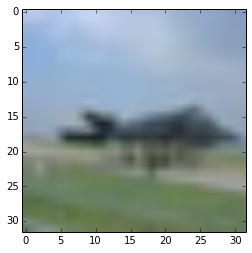

The net think this is a:  dog


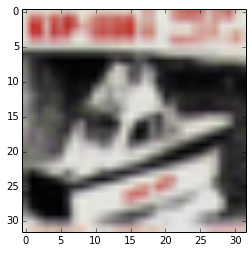

The net think this is a:  dog


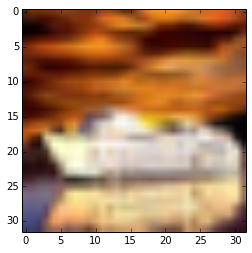

The net think this is a:  dog


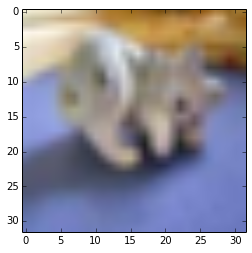

The net think this is a:  airplane


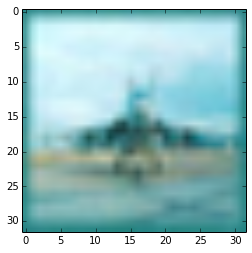

In [52]:
import matplotlib.pyplot as plt
import time
%matplotlib inline

offset = 600
X = X_train_raw[offset:offset+5].reshape(5, 3, 32, 32).transpose(0,2,3,1)


'''Create label dict'''
labelDict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship',9:'truck'}
for index in range(0,5):

# len(img)
#     
    testImg = X_train_raw[index+offset].astype('float32')
    testImg = X_train_raw[index+offset] / 255.0
    arr = numpy.array([testImg])
    labelVal = numpy.argmax(model.predict(arr, batch_size=1))
    print "The net think this is a: ", labelDict[labelVal]
    plt.imshow(X[index])
    plt.show()


### Conclusion
Probably the net needs more training or more complex layer, its up to you to figure out the best classification. 

We are gonna leave our lessons for now, however you have learned so much that you can start to tacle more complex challenges. 


Convlutional Neural Networks are one of the most interesting Computer Models if you are intersted in learning how they see the world gor to this [link] .

Some simple Convlutional Filters:
![alt test](https://blog.keras.io/img/conv5_2_stitched_filters_8x3.png)


This models can also make some tripy images like the famous **Google Deep Dream**. They work by making the neural network modify the image in the places where it see the pictures. 

Check out how you can do it in keras by running this [script] , you can even run line by line on jupyter notebook by creating a new notebook.


A deep dream example using keras:
![alt text]()
[link]:https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
[script]:https://github.com/fchollet/keras/blob/master/examples/deep_dream.py
Welcome to the world of Neural Networks my friend